In [15]:
import pandas as pd
import numpy as np
from src.Particle import ParticleType
from src.JetBuilder import JetBuilder
from src.JetImage import JetImage, JetImageCalculator, JetImageAvarageCalculator
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [2]:
data_gluon = pd.read_csv('../Data/g_jets.csv', header=None, sep=' ')
data_quark = pd.read_csv('../Data/q_jets.csv', header=None, sep=' ')
data_top = pd.read_csv('../Data/t_jets.csv', header=None, sep=' ')

In [3]:
# creating the list with the jets objects
jet_builder = JetBuilder()
# For the data exploration this amount of jets is enough
# More than that the evaluation stars to become really slower
gluon_jets = jet_builder.create_jets(data_frame=data_gluon[:10000], jet_type=ParticleType.Gluon)
quark_jets = jet_builder.create_jets(data_frame=data_quark[:10000], jet_type=ParticleType.LightQuark)
top_jets = jet_builder.create_jets(data_frame=data_top[:10000], jet_type=ParticleType.Top)

In [11]:
len(gluon_jets[4])

30

****Single jet images****

In [23]:
jet_image = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, JetImageCalculator())

In [24]:
first_gluon_image = jet_image.create_jet_image(quark_jets[10])

In [25]:
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Text(0, 0.5, '$\\eta^{rel}$')

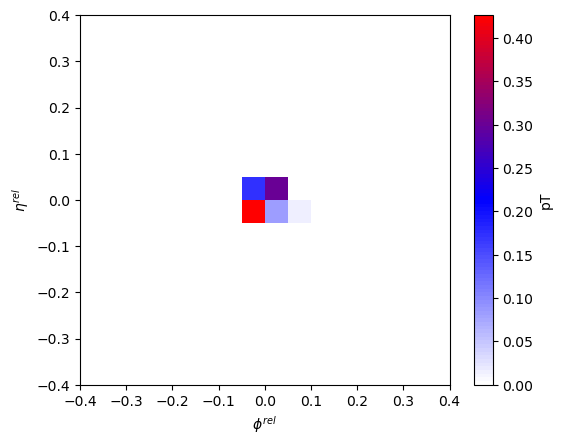

In [26]:
# import numpy as np
plt.imshow(first_gluon_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4))
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Avarage Jet Image****

In [13]:
single_jet_image = JetImageCalculator()
avg_jet_image = JetImageAvarageCalculator(jet_image_calculator=single_jet_image)
jet_image_avg = JetImage((-0.4, 0.4), (-0.4, 0.4), 20, 20, avg_jet_image)

****Top jets****

In [ ]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(top_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Gluon Jets****

In [ ]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(gluon_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Quark Jets****

In [ ]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(quark_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Energy Flow Polynomials****

In [ ]:
import energyflow as ef

In [ ]:
# all EFPs with d <= 5 
efpset = ef.EFPSet('d<=5', measure='hadr', beta=1, normed=True, verbose=True)

In [ ]:
# information about each polynomial 
index = 12
graph = efpset.graphs(index)

n, _, d, v, _, c, p, _ = efpset.specs[index]

print("Graph:", graph)
print("Number of vertices, n:", n)
print("Number of edges,    d:", d)
print("Maximum valency,    v:", v)
print("VE complexity,      c:", c)
print("Number of primes,   p:", p)

In [ ]:
# calculating the EFPs for each type of jets 
gluon_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in gluon_jets])
quarks_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in quark_jets])
top_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in top_jets])

In [ ]:
# evaluating the mean value
mean_efps_gluons = np.mean(gluon_efps, axis=0)
mean_efps_quarks = np.mean(quarks_efps, axis=0)
mean_efps_top = np.mean(top_efps, axis=0)

In [ ]:
# ploting the distribution 
index = 2
print(f"Avg EFP gluon: {mean_efps_gluons[index]}")
print(f"Avg EFP light quarks: {mean_efps_quarks[index]}")
print(f"Avg EFP top: {mean_efps_top[index]}")
plt.hist(gluon_efps[:, index], color='green', label='Gluons', histtype='step')
plt.hist(quarks_efps[:, index], color='red', label='Light Quarks', histtype='step')
plt.hist(top_efps[:, index], color='black', label='Tops', histtype='step')
plt.xlabel('EFP')
plt.legend(loc='upper right')

****Some distributions****

***PT distribution***

In [12]:
gluons_pt = np.array([jet.momentum.pt / len(jet) for jet in gluon_jets])
quark_pt = np.array([jet.momentum.pt / len(jet) for jet in quark_jets])
top_pt = np.array([jet.momentum.pt / len(jet) for jet in top_jets])

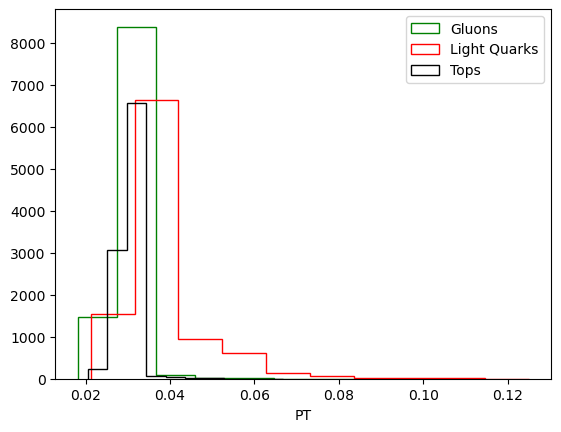

In [17]:
plt.hist(gluons_pt, color='green', label='Gluons', histtype='step')
plt.hist(quark_pt, color='red', label='Light Quarks', histtype='step')
plt.hist(top_pt, color='black', label='Tops', histtype='step')
plt.xlabel('PT')
plt.legend(loc='upper right')

***Eta distribution***

In [19]:
gluons_eta = np.array([jet.momentum.eta / len(jet) for jet in gluon_jets])
quark_eta = np.array([jet.momentum.eta / len(jet) for jet in quark_jets])
top_eta = np.array([jet.momentum.eta / len(jet) for jet in top_jets])

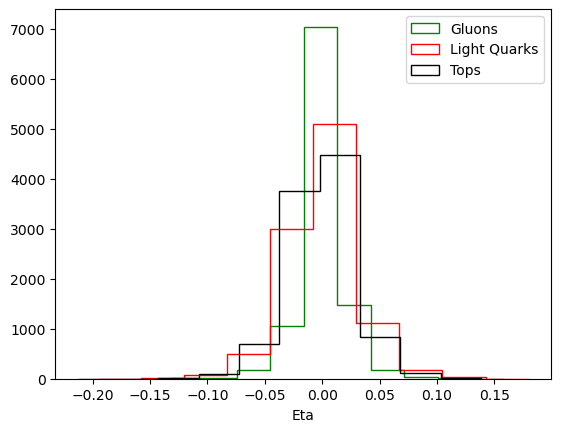

In [21]:
plt.hist(gluons_eta, color='green', label='Gluons', histtype='step')
plt.hist(quark_eta, color='red', label='Light Quarks', histtype='step')
plt.hist(top_eta, color='black', label='Tops', histtype='step')
plt.xlabel('Eta')
plt.legend(loc='upper right')

***Phi distribution***

In [22]:
gluons_phi = np.array([jet.momentum.phi / len(jet) for jet in gluon_jets])
quark_phi = np.array([jet.momentum.phi / len(jet) for jet in quark_jets])
top_phi = np.array([jet.momentum.phi / len(jet) for jet in top_jets])

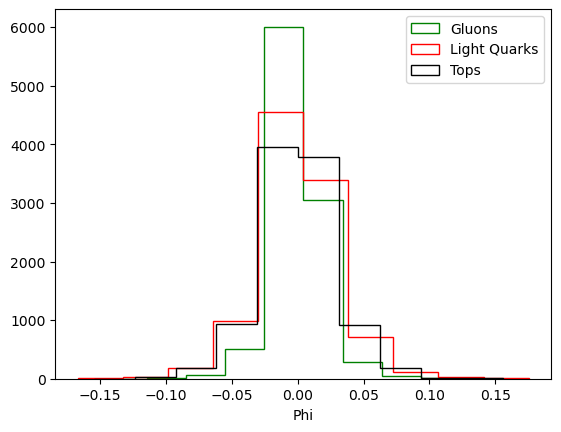

In [23]:
plt.hist(gluons_phi, color='green', label='Gluons', histtype='step')
plt.hist(quark_phi, color='red', label='Light Quarks', histtype='step')
plt.hist(top_phi, color='black', label='Tops', histtype='step')
plt.xlabel('Phi')
plt.legend(loc='upper right')